# Diabetes Prediction Project
This project aims to build a machine learning model to predict the likelihood of a patient having diabetes based on various health-related features.


## Introduction
The goal of this notebook is to perform a comprehensive analysis of the diabetes dataset, from initial exploration to building and evaluating a predictive model. The project will follow a standard data science workflow:

- Exploratory Data Analysis (EDA): Understand the data, identify patterns, and visualize relationships between features.

- Data Preprocessing             : Prepare the data for machine learning by handling categorical variables and scaling numerical features.

- Model Building                 : Train classification models to predict diabetes.

- Model Evaluation               : Assess the performance of the models using relevant metrics.

In [4]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling  import SMOTE
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import confusion_matrix, accuracy_score, precision_score, classification_report, recall_score
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
plt.style.use("tableau-colorblind10")

## Importing the dataset and initial exploration

In [6]:
df = pd.read_csv("./content/diabetes_prediction_dataset.csv")    ## importing the dataset

In [7]:
print("First 10 rows of the dataset: \n")
df.head(10)                                                      ## display the first 10 rows of the dataset

First 10 rows of the dataset: 



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [8]:
print("DataFrame information: \n")
df.info()                                                        ## Displaying a summary of the dataframe

DataFrame information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
print("Descriptive statistics: \n")
df.describe()                                                    # Displaying the descriptive statistics for numerical columns

Descriptive statistics: 



,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Initial Findings:

1. The dataset contains 100,000 entries and 9 features, along with the diabetes target variable.

2. There are no missing values, which simplifies the data cleaning process.

3. The data types are appropriate for most columns, but 'gender' and 'smoking_history' are categorical and will need to be handled.

## Exploratory Data Analysis
In this section, we will delve deeper into the data to understand the distribution of features and their relationship with the target variable.

### Univariate analysis

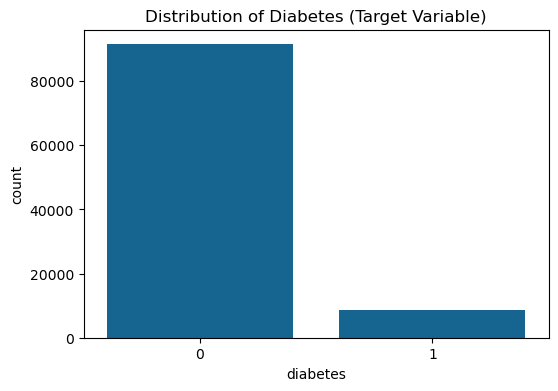

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df)                             ## Plot the distribution of the target variable.
plt.title('Distribution of Diabetes (Target Variable)')
plt.savefig('./plots/target_variable_distribution.jpeg')         ## Saving the plot for reference.
plt.show()

#### Observations:
1. The dataset is imbalanced, with a significant majority of individuals not having diabetes. This is an important consideration for model evaluation.

### Gender

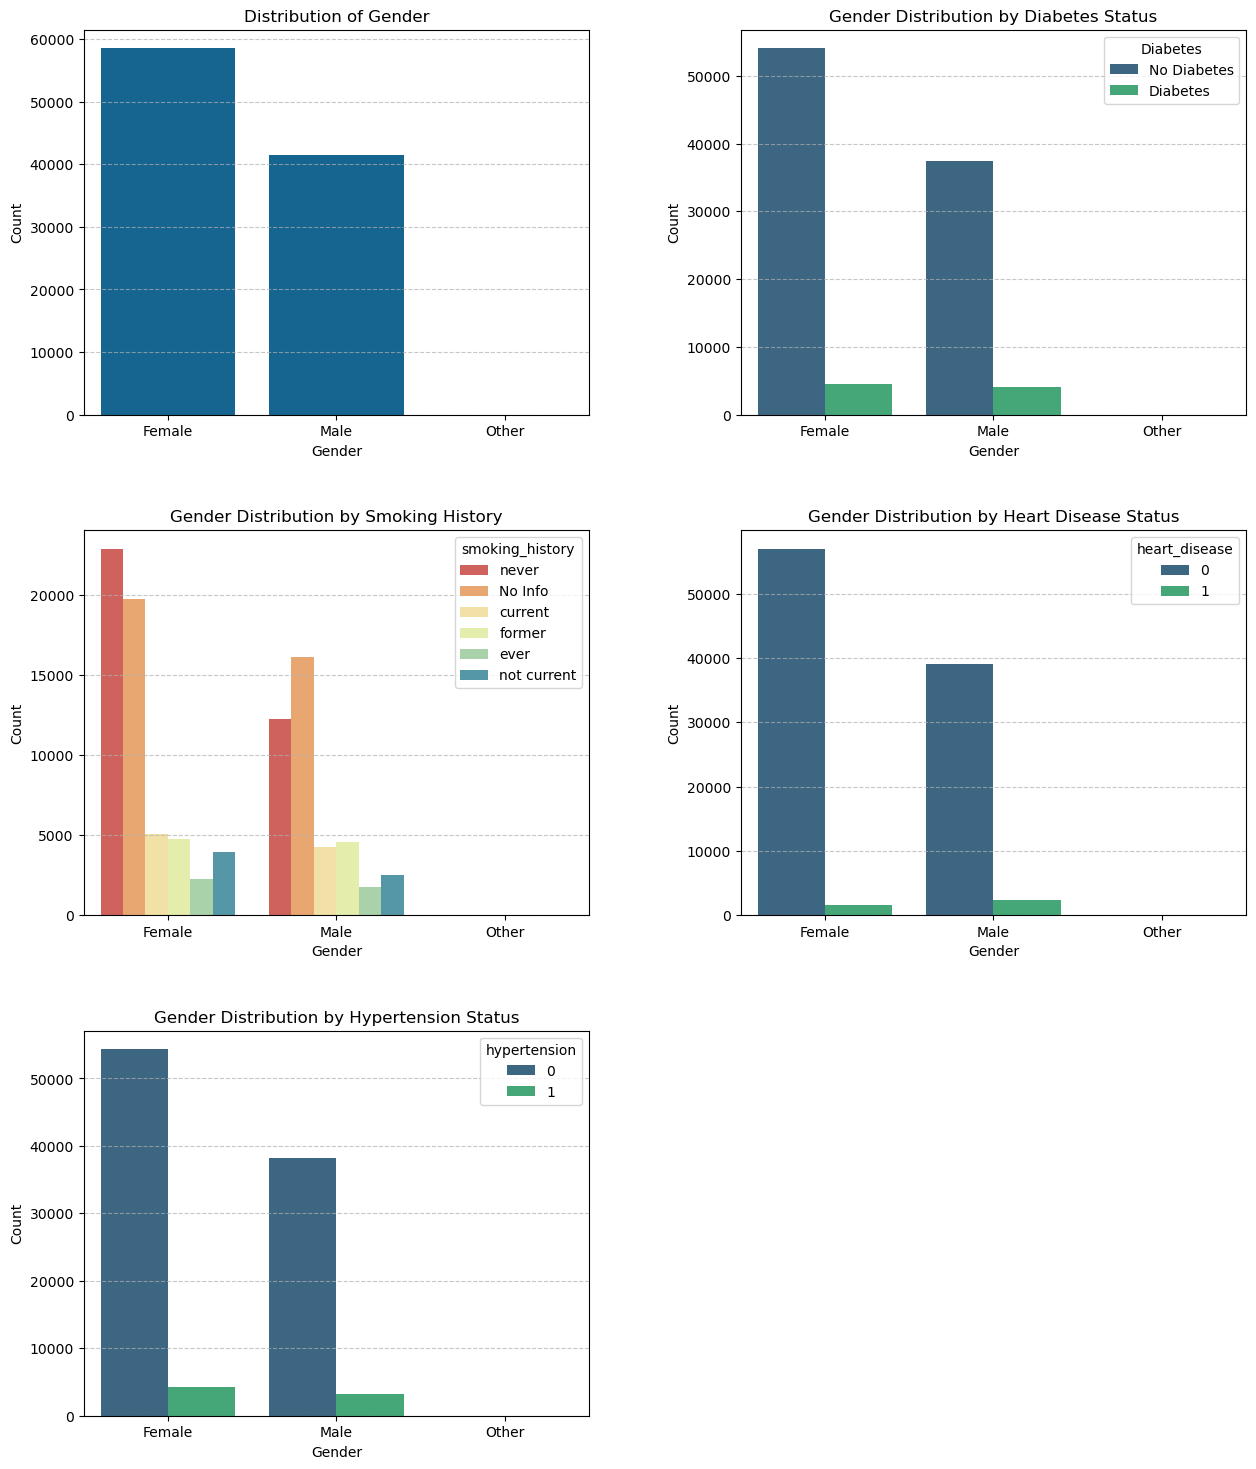

In [16]:
gender_distribution_plot = plt.figure(figsize=(15, 18))
plt.subplots_adjust(wspace=0.3, hspace=0.3)                                   ## Setting padding between each subplot.
plt.subplot(3, 2, 1)
sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index)   ## Creating a countplot to view the distribution of gender.
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 2)
sns.countplot(data=df, x='gender', hue='diabetes', palette='viridis', order=df['gender'].value_counts().index) ## Creating a countplot to view the occurence of diabetes based on gender.
plt.title('Gender Distribution by Diabetes Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 3)
sns.countplot(data=df, x='gender', hue='smoking_history', palette='Spectral', order=df['gender'].value_counts().index)
plt.title('Gender Distribution by Smoking History')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 4)
sns.countplot(data=df, x='gender', hue='heart_disease', palette='viridis', order=df['gender'].value_counts().index)
plt.title('Gender Distribution by Heart Disease Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 5)
sns.countplot(data=df, x='gender', hue='hypertension', palette='viridis', order=df['gender'].value_counts().index)
plt.title('Gender Distribution by Hypertension Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("./plots/gender_distribution.jpeg")
plt.show()

#### Observations
- Dataset has more records for females than males (female gender is ~1.5x male gender).
- Number of females having diabetes is greater than the number of males having diabetes.
- More males have heart diseases than females.
- More females have hypertension than males.

### Age

In [19]:
df['age'].describe() ## Viewing stats for the age column

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

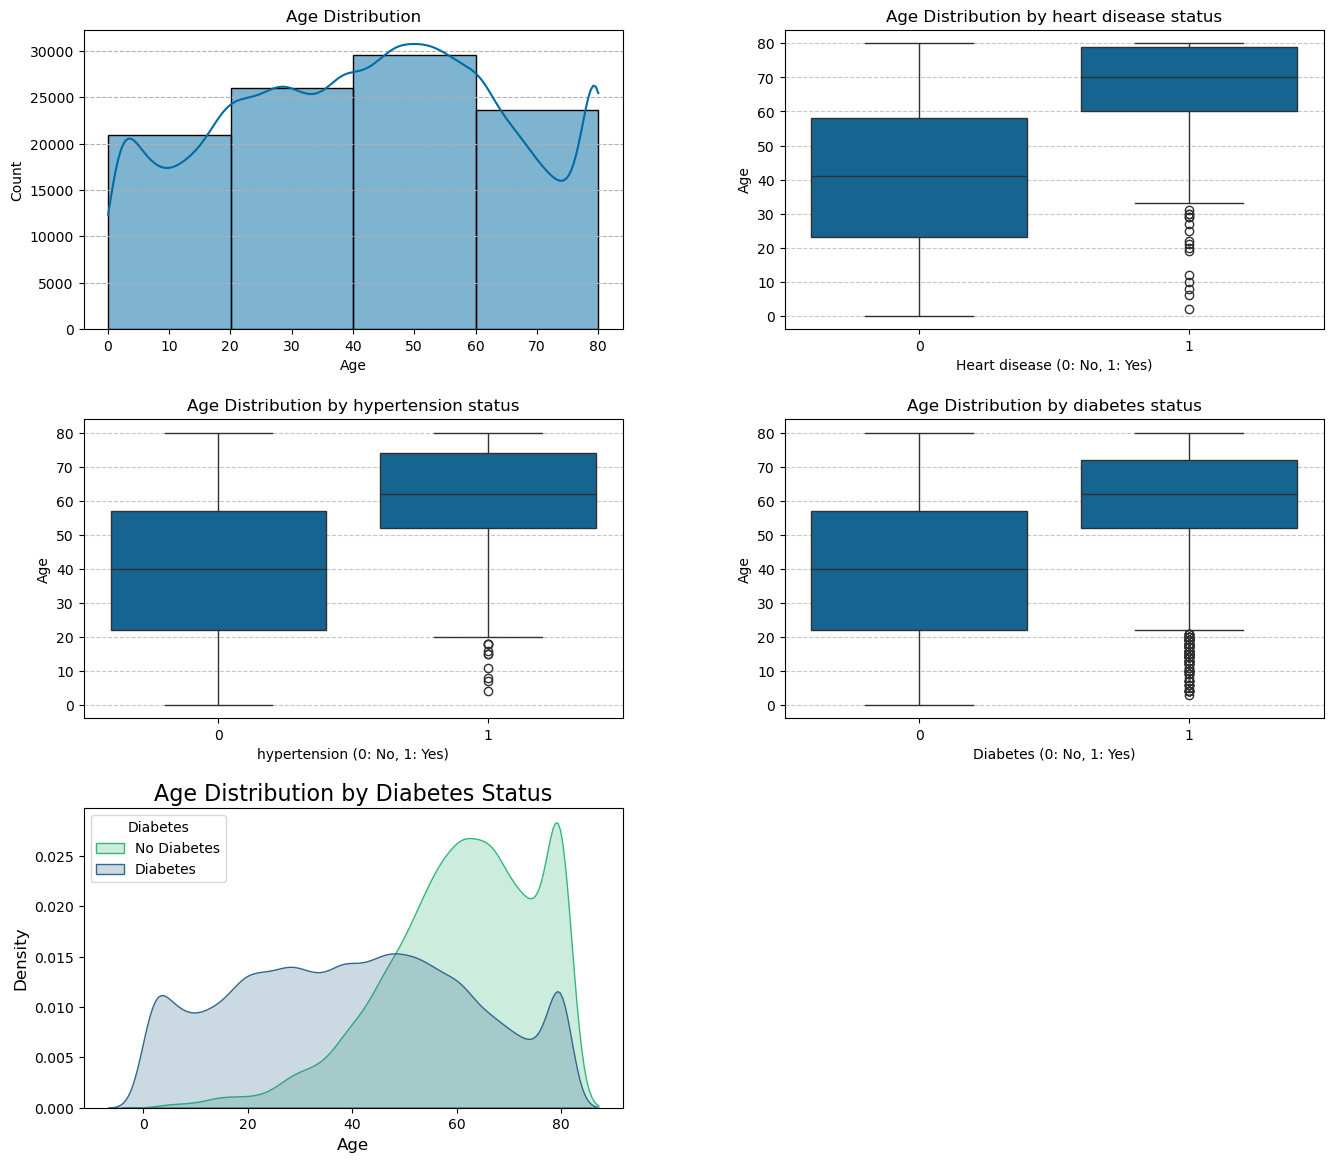

In [20]:
age_distribution_plot = plt.figure(figsize=(16, 14))

plt.subplot(3, 2, 1)
plt.subplots_adjust(wspace=0.3, hspace=0.3)                      ## Setting padding between each subplot.
sns.histplot(data=df, x="age", kde=True, bins=4)                 ## Creating a histogram to view the distribution of ages.
plt.title("Age Distribution")
plt.grid(axis='y', linestyle='--', alpha=1)
plt.xlabel("Age")

plt.subplot(3, 2, 2)
sns.boxplot(data=df, x='heart_disease', y='age')                 ## Creating a box plot to view the occurence of heart disease in various ages.
plt.title('Age Distribution by heart disease status')
plt.xlabel('Heart disease (0: No, 1: Yes)')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 3)
sns.boxplot(data=df, x='hypertension', y='age')                  ## Creating a box plot to view the occurence of hypertension in various ages.
plt.title('Age Distribution by hypertension status')
plt.xlabel('hypertension (0: No, 1: Yes)')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 4)
sns.boxplot(data=df, x='diabetes', y='age')                      ## Creating a box plot to view the occurence of diabetes in various ages.
plt.title('Age Distribution by diabetes status')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 5)
sns.kdeplot(data=df, x='age', hue='diabetes', fill=True, common_norm=False, palette='viridis') ## Creating a KDE plot to analyse the occurence of diabetes based on age.
plt.title('Age Distribution by Diabetes Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])

plt.savefig("./plots/age_distribution.jpeg")
plt.show()

#### Observations:
- From the distribution plot for age, we can observe that the majority of our data points are from individuals in the 41-60 age group.
- From the box plot for heart disease v/s age, we can observe that heart disease is quite prevelant in the 60 - 80 age group with quite a few outliers below 35.
- From the box plot for hypertension v/s age, we can observe that hypertension is quite prevelant in the 50 - 75 age group with a few outliers below 20.
- From the box plot for diabetes status v/s age, we can observe that diabetes is prevelant in the 50 - 75 age group with outliers below 22 years.

### Heart disease and Hypertension

In [23]:
heart_contingency_table = pd.crosstab(df['heart_disease'], df['hypertension'])  ## Creating a contingency table to analyse the correlation between heart disease and hypertension.
print("Contingency Table (Counts):")
print(heart_contingency_table)

Contingency Table (Counts):
hypertension       0     1
heart_disease             
0              89489  6569
1               3026   916


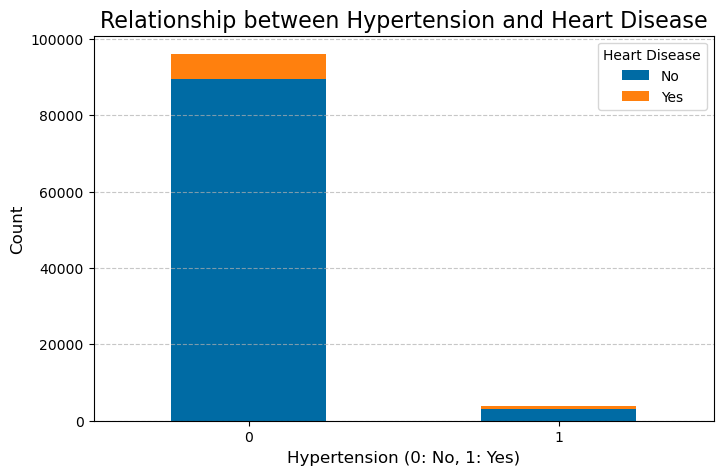

In [24]:
heart_contingency_table.plot(kind="bar", stacked=True, figsize=(8, 5))          ## Creating a stacked bar chart to compare occurence of heart disease and hypoer
plt.title('Relationship between Hypertension and Heart Disease', fontsize=16)
plt.xlabel('Hypertension (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
df[['heart_disease', 'hypertension']].corr()   ## Viewing the correlation coeffecient for heart disease and hypertension

,heart_disease,hypertension
heart_disease,1.000000,0.121262
hypertension,0.121262,1.000000


#### Observations:
- From the contingency table and stacked bar chart, we can see that there is a correlation between heart disease and hypertension. However on further analysis of correlation coefficent (0.1212) we can infer that there is a weak linear correlation.  

### Blood glucose and HbA1c

In [28]:
df[['blood_glucose_level', 'HbA1c_level']].describe()  ## Viewing the stats for blood glucose and HbA1c levels

,blood_glucose_level,HbA1c_level
count,100000.000000,100000.000000
mean,138.058060,5.527507
std,40.708136,1.070672
min,80.000000,3.500000
25%,100.000000,4.800000
50%,140.000000,5.800000
75%,159.000000,6.200000
max,300.000000,9.000000


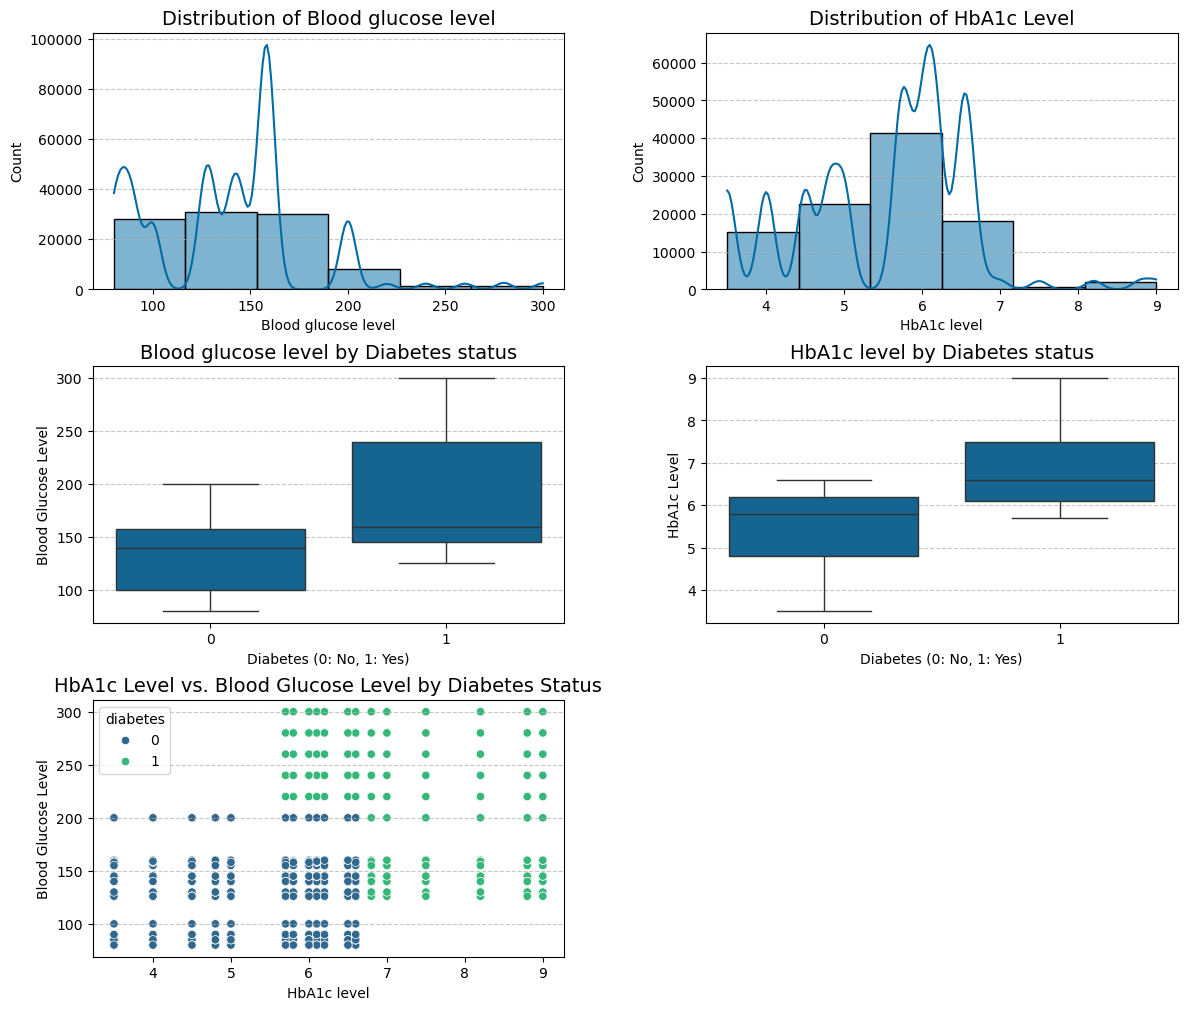

In [29]:
plt.figure(figsize=(14, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(3, 2, 1)
sns.histplot(data=df, x='blood_glucose_level', kde=True, bins=6)        ## Creating a histogram to view the distribution of blood glucose levels
plt.title('Distribution of Blood glucose level', fontsize=14)
plt.xlabel('Blood glucose level', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 2)
sns.histplot(data=df, x='HbA1c_level', kde=True, bins=6)                ## Creating a histogram to view the distribution of HbA1c levels
plt.title('Distribution of HbA1c Level', fontsize=14)
plt.xlabel('HbA1c level', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 3)
sns.boxplot(data=df, x="diabetes", y="blood_glucose_level")             ## Creating a box plot to view the distribution of blood glucose level by diabetes status.
plt.title("Blood glucose level by Diabetes status", fontsize=14)
plt.xlabel("Diabetes (0: No, 1: Yes)", fontsize=10)
plt.ylabel("Blood Glucose Level", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 4)
sns.boxplot(data=df, x="diabetes", y="HbA1c_level")                     ## Creating a box plot to view the distribution of HbA1c level by diabetes status.
plt.title("HbA1c level by Diabetes status", fontsize=14)
plt.xlabel("Diabetes (0: No, 1: Yes)", fontsize=10)
plt.ylabel("HbA1c Level", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 5)
sns.scatterplot(data=df, x='HbA1c_level', y='blood_glucose_level', hue='diabetes', palette='viridis')  ## Creating a scatter plot to view the distribution of blood glucose and HbA1c levels by diabetes status.
plt.title('HbA1c Level vs. Blood Glucose Level by Diabetes Status', fontsize=14)
plt.xlabel('HbA1c level', fontsize=10)
plt.ylabel('Blood Glucose Level', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('./plots/blood_glucose.jpeg')
plt.show()

#### Observations:
- Among the individuals with diabetes, a significant portion have blood glucose levels in the 145-240 range and HbA1c levels between 6.1% and 7.5%.

## Feature Engineering

### Smoking History

In [33]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

* From smoking history, the values 'former', 'not current' and 'ever' might mean the same thing - Individual used to smoke at some point in their life. We can reduce the number of categories to 4:
    1.  'former_or_ever' : For the values 'former', 'not current' and 'ever'
    2.  'current'        : For the value 'current'.
    3.  'never'          : For the value 'never'.
    4.  'unknown'        : For the value 'No Info'.

In [35]:
def map_smoking_history_value(smoking_history):                     ## Creating a function to help map the smoking history value to the respective category
    smoking_history = smoking_history.lower().strip()
    if smoking_history in ['former', 'not current', 'ever']:
        return 'former_or_ever'
    elif smoking_history in ['current', 'never']:
        return smoking_history
    else:
        return 'unknown'

In [36]:
df['smoking_history_mapped'] = df['smoking_history'].apply(map_smoking_history_value)

In [37]:
print(df[['smoking_history', 'smoking_history_mapped']])

      smoking_history smoking_history_mapped
0               never                  never
1             No Info                unknown
2               never                  never
3             current                current
4             current                current
...               ...                    ...
99995         No Info                unknown
99996         No Info                unknown
99997          former         former_or_ever
99998           never                  never
99999         current                current

[100000 rows x 2 columns]


### Encoding Categorical variables

#### Smoking history

In [40]:
smoking_history_encoded = pd.get_dummies(df['smoking_history_mapped'], prefix="smoking_history", dtype=int)

#### Gender

In [42]:
gender_encoded = pd.get_dummies(df['gender'], prefix="gender", dtype=int)

In [43]:
df = pd.concat([df, smoking_history_encoded, gender_encoded], axis=1)
df = df.drop(columns=["smoking_history", "smoking_history_mapped", "gender"], axis=1)

In [44]:
df.to_csv('./content/Diabetes-Classification-cleaned.csv', index=False)

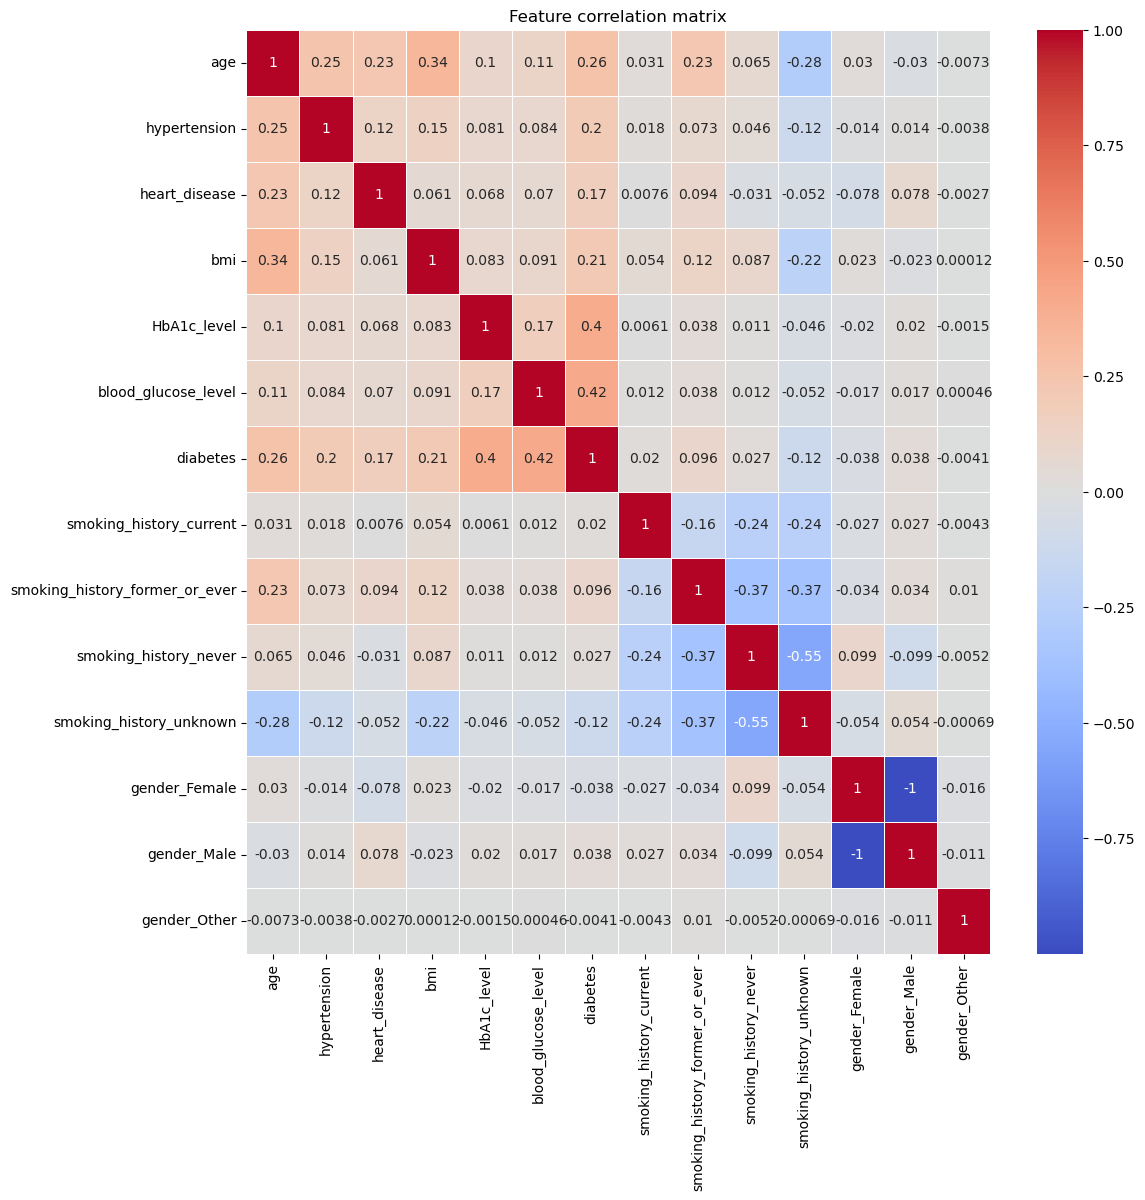

In [45]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature correlation matrix")
plt.savefig("./plots/feature_correlation_matrix.jpeg")
plt.show()

### Creating training and test samples

In [47]:
sampler = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sampler.split(df, df['diabetes']):
    training_set = df.loc[train_index]
    testing_set  = df.loc[test_index]


### Handling Class Imbalance

In [49]:
diabetes_data_count = training_set['diabetes'].value_counts()
diabetes_data_count

diabetes
0    73200
1     6800
Name: count, dtype: int64

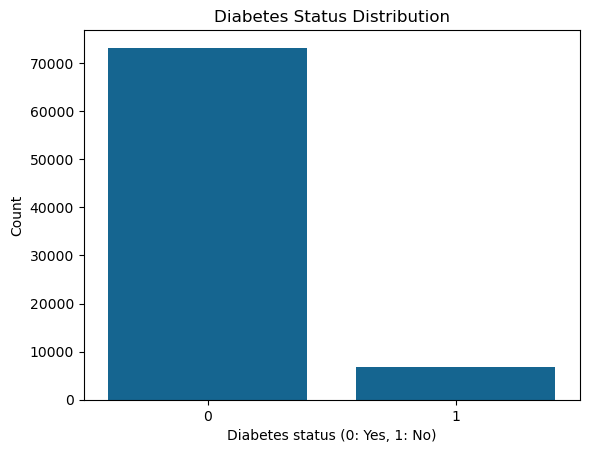

In [50]:
sns.barplot(x=diabetes_data_count.index.values, y=diabetes_data_count.values)
plt.xlabel("Diabetes status (0: Yes, 1: No)")
plt.ylabel("Count")
plt.title("Diabetes Status Distribution")
plt.show()

- From the above plot, we can see that the dataset exhibits significant class imbalance, with the negative class ('No Diabetes') comprising over 90% of the specimens. This imbalance could lead to a model that is biased towards the majority class and performs poorly on the minority class ('Diabetes').
- To overcome this, we will use SMOTE to create a balanced dataset.

### Separating feature and target variables

In [53]:
X_train = training_set.drop(columns=['diabetes'], axis=1)
y_train = training_set['diabetes']
X_test  = testing_set.drop(columns=['diabetes'], axis=1)
y_test  = testing_set['diabetes']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 13), (80000,), (20000, 13), (20000,))

In [54]:
smote = SMOTE(sampling_strategy="minority")
X_train, y_train  = smote.fit_resample(X_train, y_train)

In [55]:
y_train.value_counts()

diabetes
1    73200
0    73200
Name: count, dtype: int64

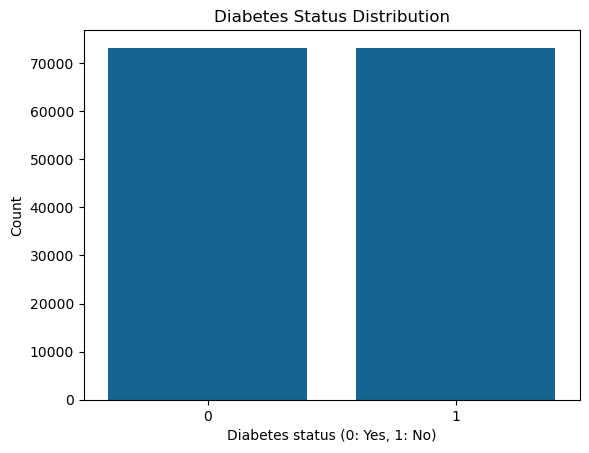

In [56]:
sns.barplot(x=y_train.value_counts().index.values, y=y_train.value_counts().values)
plt.xlabel("Diabetes status (0: Yes, 1: No)")
plt.ylabel("Count")
plt.title("Diabetes Status Distribution")
plt.show()

### Feature Scaling

In [58]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

## Model Training

In [60]:
model_scores = dict()  ## dictionary to keep track of model metrics

### Logistic Regression

In [62]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

LogisticRegression()

In [63]:
logistic_y_pred = logistic_regressor.predict(X_test)

#### Analyzing the models performance

##### Confusion matrix

In [66]:
print("Confusion matrix for logistic regression model is: \n", confusion_matrix(y_test, logistic_y_pred))

Confusion matrix for logistic regression model is: 
 [[17454   846]
 [  398  1302]]


##### Accuracy

In [68]:
logistic_accuracy_score = accuracy_score(y_test, logistic_y_pred)
print("Accuracy of the logistic regression model is: ", logistic_accuracy_score)

Accuracy of the logistic regression model is:  0.9378


- This means that the model correctly predicted 93% of the outcomes

##### Recall

In [71]:
logistic_recall_score = recall_score(y_test, logistic_y_pred)
print("Recall of the logistic regression model is: ", logistic_recall_score )

Recall of the logistic regression model is:  0.7658823529411765


- This means that of all the positives, the model correctly identified 76% of them

##### Precision

In [74]:
logistic_precision_score = precision_score(y_test, logistic_y_pred)
print("Precision of the logistic regression model is: ", logistic_precision_score)

Precision of the logistic regression model is:  0.6061452513966481


##### False positive rate

In [76]:
tn, fp, fn, tp = confusion_matrix(y_test, logistic_y_pred).ravel()

logistic_false_positive_rate = (fp / (fp + tn))

print("False positive rate of the logistic regression model is: ", logistic_false_positive_rate)

False positive rate of the logistic regression model is:  0.04622950819672131


- This means that of all the patients who do not have diabetes, the model incorrectly predicted just 4.62% of them as having diabetes

In [78]:
logistic_f1_score = (2 * logistic_precision_score * logistic_recall_score) / (logistic_recall_score + logistic_precision_score)
print("F1 score for the logistic regression model is: ", logistic_f1_score      )

F1 score for the logistic regression model is:  0.6767151767151768


In [79]:
logistic_classification_report = classification_report(y_test, logistic_y_pred, target_names=['0', '1'])
print(logistic_classification_report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     18300
           1       0.61      0.77      0.68      1700

    accuracy                           0.94     20000
   macro avg       0.79      0.86      0.82     20000
weighted avg       0.95      0.94      0.94     20000



In [80]:
logistic_model_score = dict()
logistic_model_score['precision']           = logistic_precision_score
logistic_model_score['accuracy']            = logistic_accuracy_score
logistic_model_score['recall']              = logistic_recall_score
logistic_model_score['false_positive_rate'] = logistic_false_positive_rate
logistic_model_score['f1']                  = logistic_f1_score

logistic_model_score

{'precision': 0.6061452513966481,
 'accuracy': 0.9378,
 'recall': 0.7658823529411765,
 'false_positive_rate': 0.04622950819672131,
 'f1': 0.6767151767151768}

### K Nearest Neighbors Classifier

In [82]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [83]:
knn_y_pred = knn_classifier.predict(X_test)

#### Analyzing the models performance

##### Confusion Matrix

In [86]:
print("Confusion matrix for K Nearest Neighbors classifier model is: \n", confusion_matrix(y_test, knn_y_pred))

Confusion matrix for K Nearest Neighbors classifier model is: 
 [[17561   739]
 [  464  1236]]


##### Accuracy

In [88]:
knn_accuracy_score = accuracy_score(y_test, knn_y_pred)
print("Accuracy of the K Nearest Neighbors classifier model is: ", knn_accuracy_score)

Accuracy of the K Nearest Neighbors classifier model is:  0.93985


- This means that the model correctly predicted 93% of the outcomes

In [90]:
knn_recall_score = recall_score(y_test, knn_y_pred)
print("Recall of the K Nearest Neighbors classifier model is: ", knn_recall_score)

Recall of the K Nearest Neighbors classifier model is:  0.7270588235294118


- This means that for all the patients having diabetes, the model correctly identified 72% of them.

In [92]:
knn_precision_score = precision_score(y_test, knn_y_pred)
print("Precision of the K Nearest Neighbors classifier model is: ", knn_precision_score)

Precision of the K Nearest Neighbors classifier model is:  0.6258227848101265


In [93]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_y_pred).ravel()
knn_false_positive_rate = (fp / (fp + tn))
print("False positive rate of the K Nearest Neighbors classifier model is: ", knn_false_positive_rate)

False positive rate of the K Nearest Neighbors classifier model is:  0.040382513661202185


- This means that of all the patients who do not have diabetes, the model incorrectly predicted just 4% of them as having diabetes

In [95]:
knn_classification_report = classification_report(y_test, knn_y_pred)
print(knn_classification_report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     18300
           1       0.63      0.73      0.67      1700

    accuracy                           0.94     20000
   macro avg       0.80      0.84      0.82     20000
weighted avg       0.94      0.94      0.94     20000



In [96]:
knn_f1_score = (2 * knn_precision_score * knn_recall_score) / (knn_precision_score + knn_recall_score)
print("F1 score for KNN model is: ", knn_f1_score)

F1 score for KNN model is:  0.6726530612244898


In [97]:
knn_model_score = dict()
knn_model_score['precision']           = knn_precision_score
knn_model_score['accuracy']            = knn_accuracy_score
knn_model_score['recall']              = knn_recall_score
knn_model_score['false_positive_rate'] = knn_false_positive_rate
knn_model_score['f1']                  = knn_f1_score

knn_model_score

{'precision': 0.6258227848101265,
 'accuracy': 0.93985,
 'recall': 0.7270588235294118,
 'false_positive_rate': 0.040382513661202185,
 'f1': 0.6726530612244898}

### Decision Tree classifier

In [99]:
decision_tree_classifer = DecisionTreeClassifier()
decision_tree_classifer.fit(X_train, y_train)

DecisionTreeClassifier()

In [100]:
decision_tree_y_pred = decision_tree_classifer.predict(X_test)

#### Analyzing the models performance

##### Confusion matrix

In [103]:
print("Confusion matrix for Decision Tree classifier model is: \n", confusion_matrix(y_test, decision_tree_y_pred))

Confusion matrix for Decision Tree classifier model is: 
 [[17699   601]
 [  425  1275]]


##### Accuracy

In [105]:
decision_tree_accuracy_score = accuracy_score(y_test, decision_tree_y_pred)
print("Accuracy of the Decision Tree classifier model is: ", decision_tree_accuracy_score)

Accuracy of the Decision Tree classifier model is:  0.9487


- This means that the model correctly predicted 95% of the outcomes

##### Recall

In [108]:
decision_tree_recall_score = recall_score(y_test, decision_tree_y_pred)
print("Recall of the Decision Tree classifier model is: ", decision_tree_recall_score)

Recall of the Decision Tree classifier model is:  0.75


- This means that for all the patients having diabetes, the model correctly identified 75% of them.

##### Precision

In [111]:
decision_tree_precision_score = precision_score(y_test, decision_tree_y_pred)
print("Precision of the Decision Tree classifier model is: ", decision_tree_precision_score)

Precision of the Decision Tree classifier model is:  0.679637526652452


In [112]:
tn, fp, fn, tp = confusion_matrix(y_test, decision_tree_y_pred).ravel()
decision_tree_false_positive_rate = (fp / (fp + tn))
print("False positive rate of the Decision Tree classifier model is: ", decision_tree_false_positive_rate)

False positive rate of the Decision Tree classifier model is:  0.03284153005464481


In [113]:
decision_tree_f1_score = (2 * decision_tree_precision_score * decision_tree_recall_score) / (decision_tree_precision_score + decision_tree_recall_score)
print("F1 score for decision tree model is: ", decision_tree_f1_score)

F1 score for decision tree model is:  0.7130872483221478


In [114]:
decision_tree_classification_report = classification_report(y_test, decision_tree_y_pred)
print(decision_tree_classification_report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.68      0.75      0.71      1700

    accuracy                           0.95     20000
   macro avg       0.83      0.86      0.84     20000
weighted avg       0.95      0.95      0.95     20000



In [115]:
decision_tree_model_score = dict()
decision_tree_model_score['precision']           = decision_tree_precision_score
decision_tree_model_score['accuracy']            = decision_tree_accuracy_score
decision_tree_model_score['recall']              = decision_tree_recall_score
decision_tree_model_score['false_positive_rate'] = decision_tree_false_positive_rate
decision_tree_model_score['f1']                  = decision_tree_f1_score

decision_tree_model_score

{'precision': 0.679637526652452,
 'accuracy': 0.9487,
 'recall': 0.75,
 'false_positive_rate': 0.03284153005464481,
 'f1': 0.7130872483221478}

### Hyper parameter tuning

In [117]:
param_grid = {
    "criterion"       : ["gini", "entropy"],
    "max_depth"       : [None, 5, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features"    : [None, 'sqrt', 'log2']
}

In [118]:
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=3
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 30, 40],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='f1')

In [119]:
print(f"Best params: {grid_search.best_params_}")

Best params: {'criterion': 'gini', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [120]:
grid_search.best_score_

0.9706840811281457

### Decision tree model using best hyper parameters.

In [122]:
decision_tree_model = DecisionTreeClassifier(
    criterion         = "gini",
    max_depth         = 30,
    max_features      = None,
    min_samples_leaf  = 2,
    min_samples_split = 2
)

In [123]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=2)

In [124]:
model_pred = decision_tree_model.predict(X_test)

In [125]:
model_classification_report = classification_report(y_test, model_pred)
print(model_classification_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.75      0.73      0.74      1700

    accuracy                           0.96     20000
   macro avg       0.86      0.85      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [126]:
tuned_model_precision_score = precision_score(y_test, model_pred)
print("Precision of the tuned decision model is: ", tuned_model_precision_score)

Precision of the tuned decision model is:  0.7492465340566606


In [127]:
tuned_model_accuracy_score = accuracy_score(y_test, model_pred)
print("Accuracy of the tuned decision model is: ", tuned_model_accuracy_score)

Accuracy of the tuned decision model is:  0.95635


In [128]:
tuned_model_recall_score = recall_score(y_test, model_pred)
print("Recall of the tuned decision model is: ", tuned_model_recall_score)

Recall of the tuned decision model is:  0.7311764705882353


In [129]:
tn, fp, fn, tp = confusion_matrix(y_test, model_pred).ravel()
tuned_model_false_positive_rate = (fp / (fp + tn))
print("False positive rate of the tuned model is: ", tuned_model_false_positive_rate)

False positive rate of the tuned model is:  0.02273224043715847


In [130]:
tuned_model_f1_score = (2 * tuned_model_precision_score * tuned_model_recall_score) / (tuned_model_recall_score + tuned_model_precision_score)
print("F1 score of the tuned model is: ", tuned_model_f1_score)

F1 score of the tuned model is:  0.7401012206013694


In [131]:
tuned_model_score = dict()
tuned_model_score['precision']           = tuned_model_precision_score
tuned_model_score['accuracy']            = tuned_model_accuracy_score
tuned_model_score['recall']              = tuned_model_recall_score
tuned_model_score['false_positive_rate'] = tuned_model_false_positive_rate
tuned_model_score['f1']                  = tuned_model_f1_score

tuned_model_score

{'precision': 0.7492465340566606,
 'accuracy': 0.95635,
 'recall': 0.7311764705882353,
 'false_positive_rate': 0.02273224043715847,
 'f1': 0.7401012206013694}

In [132]:
model_scores['Logistic Regression'] = logistic_model_score
model_scores['K Nearest Neighbors'] = knn_model_score
model_scores['Decision Tree']       = decision_tree_model_score
model_scores['Tuned Decision Tree'] = tuned_model_score
model_scores

{'Logistic Regression': {'precision': 0.6061452513966481,
  'accuracy': 0.9378,
  'recall': 0.7658823529411765,
  'false_positive_rate': 0.04622950819672131,
  'f1': 0.6767151767151768},
 'K Nearest Neighbors': {'precision': 0.6258227848101265,
  'accuracy': 0.93985,
  'recall': 0.7270588235294118,
  'false_positive_rate': 0.040382513661202185,
  'f1': 0.6726530612244898},
 'Decision Tree': {'precision': 0.679637526652452,
  'accuracy': 0.9487,
  'recall': 0.75,
  'false_positive_rate': 0.03284153005464481,
  'f1': 0.7130872483221478},
 'Tuned Decision Tree': {'precision': 0.7492465340566606,
  'accuracy': 0.95635,
  'recall': 0.7311764705882353,
  'false_positive_rate': 0.02273224043715847,
  'f1': 0.7401012206013694}}

In [133]:
scores_df =  pd.DataFrame.from_dict(model_scores, orient='index')
scores_df


,precision,accuracy,recall,false_positive_rate,f1
Logistic Regression,0.606145,0.93780,0.765882,0.046230,0.676715
K Nearest Neighbors,0.625823,0.93985,0.727059,0.040383,0.672653
Decision Tree,0.679638,0.94870,0.750000,0.032842,0.713087
Tuned Decision Tree,0.749247,0.95635,0.731176,0.022732,0.740101


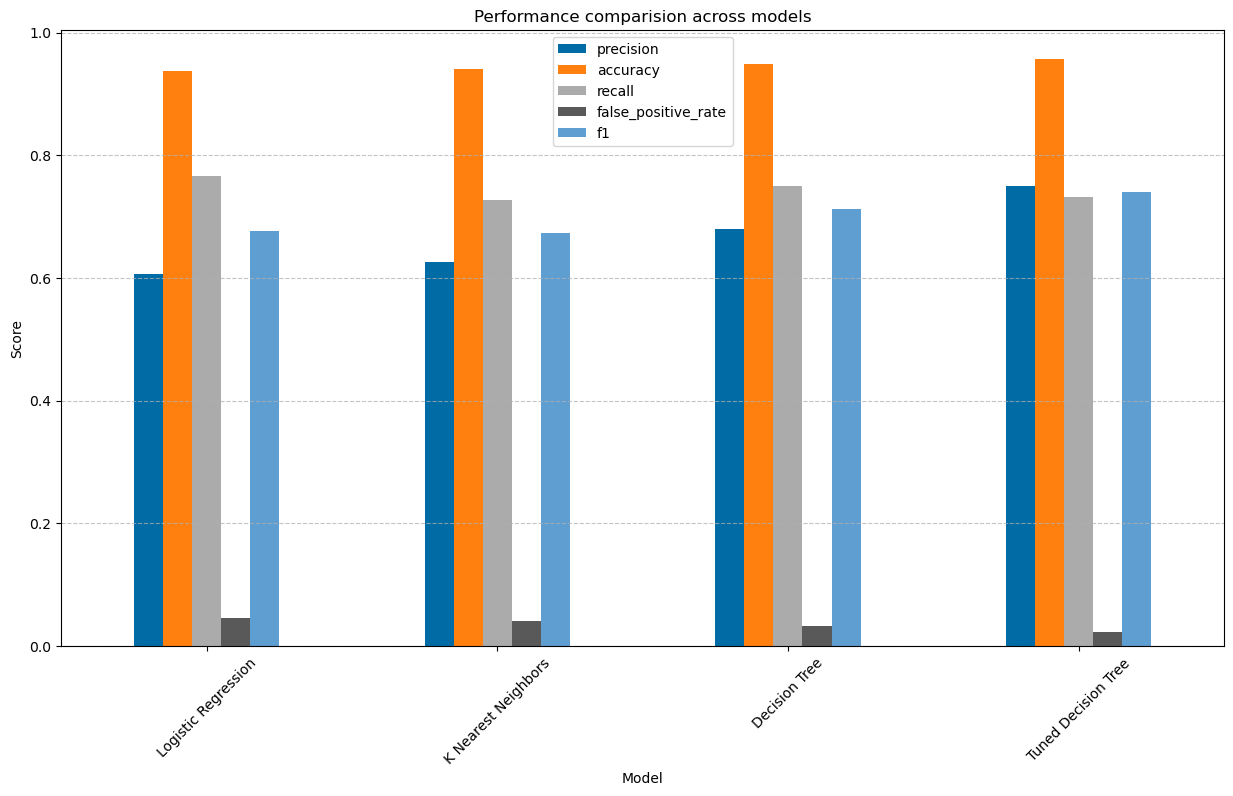

In [218]:
scores_df.plot(kind='bar', figsize=(15, 8))
plt.xticks(rotation=45)
plt.title("Performance comparision across models")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.75)
plt.savefig('./plots/model_peformance_comparision.jpeg')
plt.show()